In [1]:
module funcapp




	# use chebyshev to interpolate this:
	function q1(n)
		
	end

	function q2(n)
		
	end


	# plot the first 9 basis Chebyshev Polynomial Basisi Fnctions
	function q3()

	end

	ChebyT(x,deg) = cos(acos(x)*deg)
	unitmap(x,lb,ub) = 2.*(x.-lb)/(ub.-lb) - 1	#[a,b] -> [-1,1]

	type ChebyType
		f::Function # fuction to approximate 
		nodes::Union{Vector,LinSpace} # evaluation points
		basis::Matrix # basis evaluated at nodes
		coefs::Vector # estimated coefficients

		deg::Int 	# degree of chebypolynomial
		lb::Float64 # bounds
		ub::Float64

		# constructor
		function ChebyType(_nodes::Union{Vector,LinSpace},_deg,_lb,_ub,_f::Function)
			n = length(_nodes)
			y = _f(_nodes)
			_basis = Float64[ChebyT(unitmap(_nodes[i],_lb,_ub),j) for i=1:n,j=0:_deg]
			_coefs = _basis \ y  # type `?\` to find out more about the backslash operator. depending the args given, it performs a different operation
			# create a ChebyType with those values
			new(_f,_nodes,_basis,_coefs,_deg,_lb,_ub)
		end
	end
	
	# function to predict points using info stored in ChebyType
	function predict(Ch::ChebyType,x_new)

		true_new = Ch.f(x_new)
		basis_new = Float64[ChebyT(unitmap(x_new[i],Ch.lb,Ch.ub),j) for i=1:length(x_new),j=0:Ch.deg]
		basis_nodes = Float64[ChebyT(unitmap(Ch.nodes[i],Ch.lb,Ch.ub),j) for i=1:length(Ch.nodes),j=0:Ch.deg]
		preds = basis_new * Ch.coefs
		preds_nodes = basis_nodes * Ch.coefs

		return Dict("x"=> x_new,"truth"=>true_new, "preds"=>preds, "preds_nodes" => preds_nodes)
	end

	function q4a(deg=(5,9,15),lb=-1.0,ub=1.0)


	end

	function q4b()

		
	end

	function q5()

		
	end


		# function to run all questions
	function runall()
		println("running all questions of HW-funcapprox:")
		q1(15)
		q2(15)
		q3()
		q4a()
		q4b()
		q5()
	end


end

funcapp

In [69]:
using Plots
using FastGaussQuadrature
using LaTeXStrings
using ApproxFun
using ApproXD
using Base.Test

  likely near /Users/theodurandard/.julia/v0.5/ApproXD/src/ApproXD.jl:16

Use "Dict(a=>b for (a,b) in c)" instead.

Use "Dict(a=>b for (a,b) in c)" instead.

Use "Dict(a=>b for (a,b) in c)" instead.

Use "Dict(a=>b for (a,b) in c)" instead.

Use "Dict(a=>b for (a,b) in c)" instead.

Use "Dict(a=>b for (a,b) in c)" instead.

Use "Dict(a=>b for (a,b) in c)" instead.

Use "Dict(a=>b for (a,b) in c)" instead.

Use "Dict(a=>b for (a,b) in c)" instead.

Use "Dict(a=>b for (a,b) in c)" instead.

Use "Dict(a=>b for (a,b) in c)" instead.

Use "Dict(a=>b for (a,b) in c)" instead.


In [55]:
# In this exercise you should write some code that approximates the function 
# $f(x) = x + 2x^2 - exp(-x)$ for $x\in[-3,3]$. You should define a function q1(n), 
# where n is the number of interpolation points. You should use an approximation of degree 
#deg=n-1, and you should set n=15 Chebyshev interpolation nodes.

n = 15
deg = n -1

f(x) = x .+ 2.*x.^2 - e.^(-x)

S = [-3,3] # domain of integration

z = gausschebyshev(n)[1]

x = (S[2] + S[1])/2 + (S[2] - S[1])/2.*z
# Remark that the interval is still centered, so the first term is useless in this case

F_interp_nodes = f(x)

Phi = Array{Float64}(n, deg +1)
for d in 1:(deg+1)
    Phi[:, d] = cos(acos.(z)*(d-1))
end

c = Phi\F_interp_nodes

15-element Array{Float64,1}:
  4.11921    
 10.9067     
  4.50958    
  1.91951    
 -0.65141    
  0.182413   
 -0.0433672  
  0.00894424 
 -0.0016274  
  0.000264746
 -3.89288e-5 
  5.22073e-6 
 -6.43423e-7 
  7.33377e-8 
 -7.7041e-9  

In [67]:
# predict n_new=100 new equally spaced points in $[-3,3]$ using your interpolator.

n_new = 100

x_new = linspace(S[1], S[2], n_new)

z_new = 2.*(x_new .- S[1])/(S[2] - S[1]) - 1 

Phi_new = Array{Float64}(n_new, deg+1)

for d in 0:deg
    Phi_new[:,d+1] = cos(acos.(z_new).*d)
end

F_interp_new = Phi_new * c

100-element Array{Float64,1}:
 -5.08554
 -4.56371
 -4.09664
 -3.68026
 -3.31071
 -2.98439
 -2.69788
 -2.44797
 -2.23166
 -2.0461 
 -1.88862
 -1.7567 
 -1.64798
  ⋮      
 13.1253 
 13.7646 
 14.4182 
 15.0863 
 15.7687 
 16.4656 
 17.1769 
 17.9026 
 18.6428 
 19.3974 
 20.1666 
 20.9502 


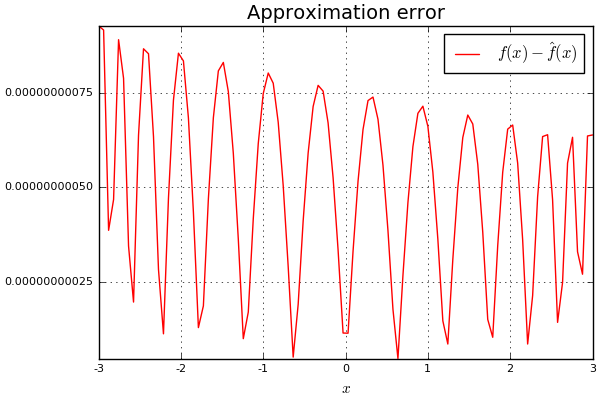

In [95]:
# make a plot with 2 panels. panel 1 shows true function values and your approximation and panel 2 shows the deviation in your 
# approximation from the true $f$.

F_new = f(x_new)

err = abs.(F_new .- F_interp_new)

plot1 = Plots.plot(x_new, [F_new, F_interp_new], line = 1, label = [L"f(x)" L"\hat{f}(x)"],
                    xlab = L"x", title = "Function Approximation", legendfont = font(12))

plot2 = Plots.plot(x_new, err, line = 1, color = :red, label = L"$f(x) - \hat{f}(x)$", xlab = L"x",
                        title = "Approximation error", legendfont = font(12))

In [83]:
# Write an automated test that passes if the maximal deviation in your approximation from 
# the true $f$ is smaller than 1e-9.

n_test = 300

x_test = (rand(n_test) - 1/2) *(S[2] - S[1])

z_test = 2.*(x_test .- S[1])/(S[2] - S[1]) - 1 

Phi_test = Array{Float64}(n_test, deg+1)

for d in 0:deg
    Phi_test[:,d+1] = cos(acos.(z_test).*d)
end

F_interp_test = Phi_test * c

@test maxabs(F_interp_test - f.(x_test)) < 1e-9

Test Passed
  Expression: maxabs(F_interp_test - f.(x_test)) < 1.0e-9
   Evaluated: 9.162341996216128e-10 < 1.0e-9

In [76]:
? rand()

```
rand([rng], [S], [dims...])
```

Pick a random element or array of random elements from the set of values specified by `S`; `S` can be

  * an indexable collection (for example `1:n` or `['x','y','z']`), or
  * a type: the set of values to pick from is then equivalent to `typemin(S):typemax(S)` for integers (this is not applicable to `BigInt`), and to $[0, 1)$ for floating point numbers;

`S` defaults to `Float64`.


In [93]:
? Plots.plot

The main plot command.  Use `plot` to create a new plot object, and `plot!` to add to an existing one:

```
    plot(args...; kw...)                  # creates a new plot window, and sets it to be the current
    plot!(args...; kw...)                 # adds to the `current`
    plot!(plotobj, args...; kw...)        # adds to the plot `plotobj`
```

There are lots of ways to pass in data, and lots of keyword arguments... just try it and it will likely work as expected. When you pass in matrices, it splits by columns.  See the documentation for more info.
